# Project 2 OpenClassroom

Analysis of education statistics provided by the World Bank
https://datacatalog.worldbank.org/dataset/education-statistics

### Import of the required modules

In [1]:
## To display the graphs within the code and not in another windows 
import sys
print("Python Version :"+str(sys.version_info))
%matplotlib inline
#To be able to use CSV
import csv
print("CSV Version :"+csv.__version__)
# To be able to use Numpy
import numpy as np
print("Numpy Version :"+np.__version__)
# To be able to use Pandas
import pandas as pd
print("Pandas Version :"+pd.__version__)
# To be able to use Maplotlib
import matplotlib.pyplot as plt

# To be able to use Seaborn
import seaborn as sns
print("Seaborn Version :"+sns.__version__)

# To be able to use Warning
import warnings



Python Version :sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
CSV Version :1.0
Numpy Version :1.17.2
Pandas Version :0.25.1
Seaborn Version :0.9.0


### Init of the main variables

In [2]:
chunksize=10000
number_of_lines=0
number_of_columns=0
size_of_the_dataset=0

EdStatsDataChunkWithSelectedYears=pd.DataFrame()
number_of_nan_by_column=pd.Series()
number_of_nan_by_row=pd.Series()

selected_columns=['Country Name', 'Country Code', 'Indicator Name','Indicator Code']
selected_years=['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']

#Disable the warnings "ignore"
warnings.filterwarnings("ignore")

### Reading of the file
Previously, the file is downloaded from the World Bank and stored locally.

As the file size is big, it is splitted in small parts. (Chunk)
In order to be able to do some statistics related to data quality, the number of Nan by column and by row are computed in only selecting the year columns.

In [3]:
# The data file is too big so it is opened in small parts
for EdStatsDataChunk in pd.read_csv('./Edstats_csv/EdStatsData.csv', sep=',', header=0, chunksize=chunksize):
    #as the file is splitted in several parts, it is required to have some counters for the line number and the column number
    number_of_lines= number_of_lines + EdStatsDataChunk.shape[0]
    number_of_columns=EdStatsDataChunk.shape[1]
    size_of_the_dataset= size_of_the_dataset+ EdStatsDataChunk.size
    #print("Shape "+str(EdStatsDataChunk.shape) + " Size "+ str(EdStatsDataChunk.size))
    number_of_nan_by_column=number_of_nan_by_column.add(EdStatsDataChunk.iloc[:,len(selected_columns):].isnull().sum(), fill_value=0)
    number_of_nan_by_row=number_of_nan_by_row.add(EdStatsDataChunk.iloc[:,len(selected_columns):].isnull().sum(axis=1), fill_value=0)
    EdStatsDataChunkWithSelectedYears=pd.concat([EdStatsDataChunkWithSelectedYears,EdStatsDataChunk[selected_columns+selected_years]],axis=0,join='outer')


### Display some rows of the original dataset

In [4]:
EdStatsDataChunk.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
880000,Zambia,ZMB,Barro-Lee: Percentage of population age 25+ wi...,BAR.TER.CMPT.25UP.ZS,0.39,NaN,NaN,NaN,NaN,0.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880001,Zambia,ZMB,Barro-Lee: Percentage of population age 25+ wi...,BAR.TER.ICMP.25UP.ZS,0.60,NaN,NaN,NaN,NaN,0.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880002,Zambia,ZMB,Barro-Lee: Percentage of population age 25-29 ...,BAR.NOED.2529.ZS,35.40,NaN,NaN,NaN,NaN,32.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880003,Zambia,ZMB,Barro-Lee: Percentage of population age 25-29 ...,BAR.PRM.CMPT.2529.ZS,12.30,NaN,NaN,NaN,NaN,22.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880004,Zambia,ZMB,Barro-Lee: Percentage of population age 25-29 ...,BAR.PRM.ICMP.2529.ZS,61.20,NaN,NaN,NaN,NaN,55.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Display of some statistics on the original dataset
###### Print the number of lines and the number of columns

In [5]:
#Display of some statistics on the original dataset
print("Number of Lines "+str(number_of_lines)+" "+ "\nNumber of Columns "+ str(number_of_columns))


Number of Lines 886930 
Number of Columns 70


The number of lines is huge.

###### Print the columns name

In [6]:
print("Columns name " + EdStatsDataChunk.columns.values)

['Columns name Country Name' 'Columns name Country Code'
 'Columns name Indicator Name' 'Columns name Indicator Code'
 'Columns name 1970' 'Columns name 1971' 'Columns name 1972'
 'Columns name 1973' 'Columns name 1974' 'Columns name 1975'
 'Columns name 1976' 'Columns name 1977' 'Columns name 1978'
 'Columns name 1979' 'Columns name 1980' 'Columns name 1981'
 'Columns name 1982' 'Columns name 1983' 'Columns name 1984'
 'Columns name 1985' 'Columns name 1986' 'Columns name 1987'
 'Columns name 1988' 'Columns name 1989' 'Columns name 1990'
 'Columns name 1991' 'Columns name 1992' 'Columns name 1993'
 'Columns name 1994' 'Columns name 1995' 'Columns name 1996'
 'Columns name 1997' 'Columns name 1998' 'Columns name 1999'
 'Columns name 2000' 'Columns name 2001' 'Columns name 2002'
 'Columns name 2003' 'Columns name 2004' 'Columns name 2005'
 'Columns name 2006' 'Columns name 2007' 'Columns name 2008'
 'Columns name 2009' 'Columns name 2010' 'Columns name 2011'
 'Columns name 2012' 'Column

The first four columns provide information related to the countries and to the indicators. The remaning columns provide results for 65 years frm 1970 to 2100

###### Print the size of the original dataset

In [7]:
print("Size of the original dataset "+str(size_of_the_dataset))

Size of the original dataset 62085100


###### Print the number of Nan in each relevant column (related to years from 1970 to 2100) 

Description of Nan in each column 
 count        66.000000
mean     809926.954545
std       48143.240304
min      644488.000000
25%      764588.500000
50%      835494.000000
75%      848255.000000
max      886930.000000
dtype: float64


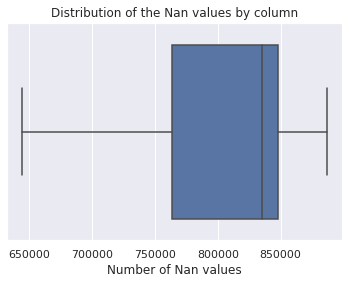

In [8]:
print("Description of Nan in each column \n "+str(number_of_nan_by_column.describe()))

sns.set(color_codes=True)
columns_name_array=EdStatsDataChunk.columns.values[len(selected_columns):-1]
years_series=pd.Series(columns_name_array, index=columns_name_array)
number_of_nan_by_column_df=pd.DataFrame({ 'Year':years_series,'Nan': number_of_nan_by_column }, index=years_series )
#number_of_nan_by_column_df.plot.bar() 
bx=sns.boxplot(x='Nan', data=number_of_nan_by_column_df)
bx.set_title('Distribution of the Nan values by column')
bx.set_xlabel('Number of Nan values')
plt.show()
#sns.distplot(number_of_nan_by_row)

809926 cells are empties on average on 886930. The dataset is composed of a lot of Nan values. 
###### Print the number of Nan in each row for the relevant columns (related to years from 1970 to 2100) 

Description of Nan in each row 
 count    886930.000000
mean         60.269896
std          10.133759
min          19.000000
25%          57.000000
50%          66.000000
75%          66.000000
max          66.000000
dtype: float64


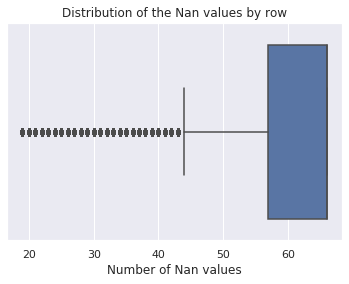

In [9]:
print("Description of Nan in each row \n "+str(number_of_nan_by_row.describe()))
number_of_nan_by_row_df=pd.DataFrame({ 'Nan': number_of_nan_by_row } )

bx=sns.boxplot(x='Nan', data=number_of_nan_by_row_df)
bx.set_title('Distribution of the Nan values by row')
bx.set_xlabel('Number of Nan values')
plt.show()


60 cells are empties on average on 66 relevant columns. The dataset is composed a lot of Nan values.
###### Print the number of indicators by country

In [10]:
print("Number of lines by country \n" +str(EdStatsDataChunkWithSelectedYears[['Country Name','Indicator Code']].groupby(['Country Name']).count() ))

Number of lines by country 
                    Indicator Code
Country Name                      
Afghanistan                   3665
Albania                       3665
Algeria                       3665
American Samoa                3665
Andorra                       3665
...                            ...
West Bank and Gaza            3665
World                         3665
Yemen, Rep.                   3665
Zambia                        3665
Zimbabwe                      3665

[242 rows x 1 columns]


###### Display the number of values par years

Number of values in each column for the selected years dataset 
 count        11.000000
mean     150365.181818
std       34941.120319
min      113789.000000
25%      135829.500000
50%      140312.000000
75%      146638.000000
max      242442.000000
dtype: float64


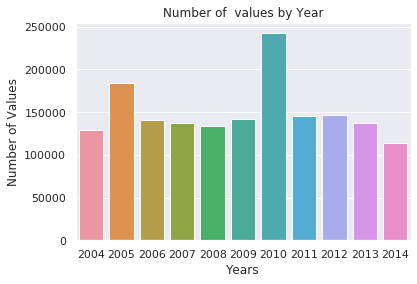

In [11]:
number_of_data_by_column_selected_years=EdStatsDataChunkWithSelectedYears.iloc[:,len(selected_columns):].count()
print("Number of values in each column for the selected years dataset \n "+str(number_of_data_by_column_selected_years.describe()))

selected_years_series=pd.Series(selected_years, index=selected_years)
number_of_data_by_column_df=pd.DataFrame({ 'Year':selected_years_series,'Values': number_of_data_by_column_selected_years }, index=selected_years_series )
sns.set(color_codes=True)
ax=sns.barplot(x='Year',y='Values', data=number_of_data_by_column_df)
ax.set_title('Number of  values by Year')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Values')
#sns.set_style("whitegrid")
#sns.boxplot(data=number_of_nan_by_column, palette="deep")
#sns.despine(left=True)

plt.show()

###### Drop the empty lines

In [12]:
#Drop the duplicated lines './Edstats_csv/EdStatsData.csv', sep=',', header=0,
EdStatsDataChunkWithSelectedYears.drop_duplicates(subset=selected_years,keep='first',inplace=True)
#Save the Dataframe in a CSV file
EdStatsDataChunkWithSelectedYears.to_csv('./Edstats_csv/EdStatsDataSelectedYears.csv', sep=',',header=True,quoting=csv.QUOTE_ALL,columns=selected_columns+selected_years, index=False) 


### Display of some statistics on the subset dataset without duplicate
###### Print the number of lines and the number of columns

In [13]:
#Display of some statistics on the selected years and on the removal of the duplicates
number_of_lines_trunked_dataset= EdStatsDataChunkWithSelectedYears.shape[0]
number_of_columns_trunked_dataset=EdStatsDataChunkWithSelectedYears.shape[1]
print("Number of Lines "+str(number_of_lines_trunked_dataset)+" "+ "Number of Columns "+ str(number_of_columns_trunked_dataset))

Number of Lines 275740 Number of Columns 15


###### Print the size of the subset dataset

In [14]:
size_of_the_dataset= EdStatsDataChunkWithSelectedYears.size
print("Size of the first clean dataset "+str(size_of_the_dataset))

Size of the first clean dataset 4136100


##### Print the size of the subset dataset

In [15]:
EdStatsDataChunkWithSelectedYears.iloc[:,len(selected_columns):].isnull().sum()
print("Number of Nulls \n"+str(EdStatsDataChunkWithSelectedYears.iloc[:,len(selected_columns):].isnull().sum()))


Number of Nulls 
2004    151209
2005    104760
2006    140041
2007    142956
2008    145564
2009    138513
2010     89717
2011    134681
2012    134302
2013    143608
2014    167224
dtype: int64


Thanks to the removal of the dupplicate, the number of Nan values significally descreased

###### Print the number of Nan by colums for the selected years

Description of Nan in each column for the selected years dataset 
 count        11.000000
mean     135688.636364
std       21326.613975
min       89717.000000
25%      134491.500000
50%      140041.000000
75%      144586.000000
max      167224.000000
dtype: float64


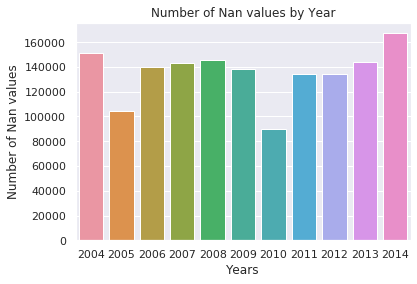

In [16]:
number_of_nan_by_column_selected_years=EdStatsDataChunkWithSelectedYears.iloc[:,len(selected_columns):].isnull().sum()
print("Description of Nan in each column for the selected years dataset \n "+str(number_of_nan_by_column_selected_years.describe()))


selected_years_series=pd.Series(selected_years, index=selected_years)
number_of_nan_by_column_df=pd.DataFrame({ 'Year':selected_years_series,'Nan': number_of_nan_by_column_selected_years }, index=selected_years_series )
sns.set(color_codes=True)
ax=sns.barplot(x='Year',y='Nan', data=number_of_nan_by_column_df)
ax.set_title('Number of Nan values by Year')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Nan values')
#sns.set_style("whitegrid")
#sns.boxplot(data=number_of_nan_by_column, palette="deep")
#sns.despine(left=True)

plt.show()

###### Print the number of relevant values for the selected years dataset

Number of values in each column for the selected years dataset 
 count        11.000000
mean     140051.363636
std       21326.613975
min      108516.000000
25%      131154.000000
50%      135699.000000
75%      141248.500000
max      186023.000000
dtype: float64


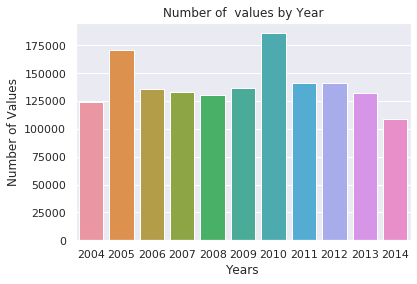

In [17]:
number_of_data_by_column_selected_years=EdStatsDataChunkWithSelectedYears.iloc[:,len(selected_columns):].count()
print("Number of values in each column for the selected years dataset \n "+str(number_of_data_by_column_selected_years.describe()))

selected_years_series=pd.Series(selected_years, index=selected_years)
number_of_data_by_column_df=pd.DataFrame({ 'Year':selected_years_series,'Values': number_of_data_by_column_selected_years }, index=selected_years_series )
sns.set(color_codes=True)
ax=sns.barplot(x='Year',y='Values', data=number_of_data_by_column_df)
ax.set_title('Number of  values by Year')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Values')
#sns.set_style("whitegrid")
#sns.boxplot(data=number_of_nan_by_column, palette="deep")
#sns.despine(left=True)

plt.show()


We can notice in 2005 and 2010, we have more data probably due to a survey that is pursued every 5 Year.

######  Print the number of Nan by row for the selected years

Description of Nan in each row  for the selected years dataset 
 count    275740.000000
mean          5.412980
std           4.079564
min           0.000000
25%           1.000000
50%           7.000000
75%           9.000000
max          11.000000
dtype: float64


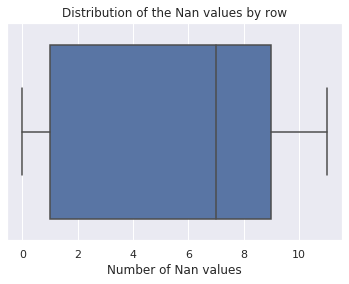

In [18]:
number_of_nan_by_row_selected_years=EdStatsDataChunkWithSelectedYears.iloc[:,len(selected_columns):].isnull().sum(axis=1)
print("Description of Nan in each row  for the selected years dataset \n "+str(number_of_nan_by_row_selected_years.describe()))
number_of_nan_by_row_selected_years_df=pd.DataFrame({ 'Nan': number_of_nan_by_row_selected_years } )
cx=sns.boxplot(x='Nan', data=number_of_nan_by_row_selected_years_df)
cx.set_title('Distribution of the Nan values by row')
cx.set_xlabel('Number of Nan values')
plt.show()

Thanks to the removal of the dupplicate, the number of Nan values significally descreased

###### Some relevant KPI on the dataset

In [19]:
print("Number of lines by country\n" +str(EdStatsDataChunkWithSelectedYears[['Country Name','Indicator Code']].groupby(['Country Name']).count() ))
print("List of the remaining indicators \n"+str(EdStatsDataChunkWithSelectedYears['Indicator Code'].unique()))
print("Number of the remaining indicators \n"+str(len(EdStatsDataChunkWithSelectedYears['Indicator Code'].unique())))



Number of lines by country
                    Indicator Code
Country Name                      
Afghanistan                   1199
Albania                       1930
Algeria                       1410
American Samoa                  14
Andorra                        711
...                            ...
West Bank and Gaza            1034
World                          487
Yemen, Rep.                   1212
Zambia                        1392
Zimbabwe                      1654

[242 rows x 1 columns]
List of the remaining indicators 
['UIS.NERA.2' 'SE.PRM.TENR' 'SE.PRM.TENR.FE' ... 'LO.EGRA.READ.0.LUN.2GRD'
 'LO.EGRA.READ.0.LUV.2GRD' 'LO.EGRA.READ.0.SIL.2GRD']
Number of the remaining indicators 
3275


The number of remaining indicators is quite high. The next step is to select the relevant indicator from business point of view.

### Filtering on the indicators
###### The indicators are filtered from business perspectives

In [20]:
population="SP.POP.TOTL"
population_1564="SP.POP.1564.TO"
tertiary_population="SP.TER.TOTL.IN"
secondary_population="SP.SEC.TOTL.IN"
secondary_education_2024="BAR.SEC.CMPT.2024.ZS"
secondary_education_2529="BAR.SEC.CMPT.2529.ZS"
secondary_education_3034="BAR.SEC.CMPT.3034.ZS"


tertiary_education_2024="BAR.TER.CMPT.2024.ZS"
tertiary_education_2529="BAR.TER.CMPT.2529.ZS"
tertiary_education_3034="BAR.TER.CMPT.3034.ZS"

english_reading_grade2="LO.EGRA.READ.ENG.ADV.2GRD"
english_reading_grade3="LO.EGRA.READ.ENG.ADV.3GRD"
english_reading_grade4="LO.EGRA.READ.ENG.ADV.4GRD"

internet="IT.NET.USER.P2"
gdp_per_capita="NY.GDP.PCAP.CD"
gdp="NY.GDP.MKTP.CD"
education_expenditure="SE.XPD.TOTL.GB.ZS"

indicators=[]
indicators.append(population)
indicators.append(population_1564)
indicators.append(secondary_population)
indicators.append(tertiary_population)
indicators.append(secondary_education_2024)
indicators.append(secondary_education_2529)
indicators.append(secondary_education_3034)
indicators.append(tertiary_education_2024)
indicators.append(tertiary_education_2529)
indicators.append(tertiary_education_3034)
indicators.append(english_reading_grade2)
indicators.append(english_reading_grade3)
indicators.append(english_reading_grade4)
indicators.append(internet)
indicators.append(gdp_per_capita)
indicators.append(gdp)
indicators.append(education_expenditure)








###### Print the dataset with the selected indicators

In [21]:
print("Indicators "+str(indicators))
indicators_mask=EdStatsDataChunkWithSelectedYears['Indicator Code'].isin(indicators)

EdStatsWithSelectedIndicators=EdStatsDataChunkWithSelectedYears[indicators_mask]
print(EdStatsWithSelectedIndicators.head(15))

Indicators ['SP.POP.TOTL', 'SP.POP.1564.TO', 'SP.SEC.TOTL.IN', 'SP.TER.TOTL.IN', 'BAR.SEC.CMPT.2024.ZS', 'BAR.SEC.CMPT.2529.ZS', 'BAR.SEC.CMPT.3034.ZS', 'BAR.TER.CMPT.2024.ZS', 'BAR.TER.CMPT.2529.ZS', 'BAR.TER.CMPT.3034.ZS', 'LO.EGRA.READ.ENG.ADV.2GRD', 'LO.EGRA.READ.ENG.ADV.3GRD', 'LO.EGRA.READ.ENG.ADV.4GRD', 'IT.NET.USER.P2', 'NY.GDP.PCAP.CD', 'NY.GDP.MKTP.CD', 'SE.XPD.TOTL.GB.ZS']
                                     Country Name Country Code  \
1243                                   Arab World          ARB   
1245                                   Arab World          ARB   
1375                                   Arab World          ARB   
2323                                   Arab World          ARB   
2326                                   Arab World          ARB   
2486                                   Arab World          ARB   
2533                                   Arab World          ARB   
4908                          East Asia & Pacific          EAS   
4910               

###### Del the EdStatsDataChunkWithSelectedYears for memory purposes

In [22]:
del EdStatsDataChunkWithSelectedYears

###### Print the number of lines and columns

In [23]:
number_of_lines=EdStatsWithSelectedIndicators.shape[0]
number_of_columns=EdStatsWithSelectedIndicators.shape[1]
print("Number of Lines "+str(number_of_lines)+"\n"+ "Number of Columns "+ str(number_of_columns))

Number of Lines 2586
Number of Columns 15


###### Print the number of Nan by row and by colum 

Description of Nan in each column 
 count     12.000000
mean     693.000000
std      388.879977
min        0.000000
25%      682.750000
50%      892.000000
75%      910.750000
max      949.000000
dtype: float64
Description of Nan in each row 
 count    2586.000000
mean        3.215777
std         4.187187
min         0.000000
25%         0.000000
50%         0.000000
75%         9.000000
max        10.000000
dtype: float64
Description of Nan in each column for the selected indicators in the dataset 
 count     12.000000
mean     693.000000
std      388.879977
min        0.000000
25%      682.750000
50%      892.000000
75%      910.750000
max      949.000000
dtype: float64


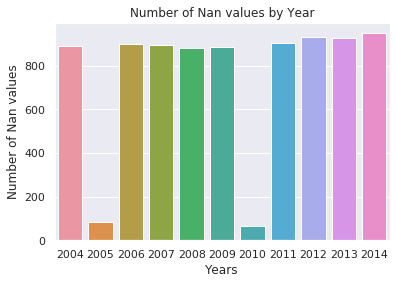

In [24]:
EdStatsWithSelectedIndicators.insert(column='Counter',value=EdStatsWithSelectedIndicators.iloc[:,len(selected_columns):].count(axis=1).tolist(),loc=EdStatsWithSelectedIndicators.shape[1])
print("Description of Nan in each column \n "+str(EdStatsWithSelectedIndicators.iloc[:,len(selected_columns):].isnull().sum().describe()))
print("Description of Nan in each row \n "+str(EdStatsWithSelectedIndicators.iloc[:,len(selected_columns):].isnull().sum(axis=1).describe()))


number_of_nan_by_column_indicators=EdStatsWithSelectedIndicators.iloc[:,len(selected_columns):].isnull().sum()
print("Description of Nan in each column for the selected indicators in the dataset \n "+str(number_of_nan_by_column_indicators.describe()))


selected_years_series=pd.Series(selected_years, index=selected_years)
number_of_nan_by_column_indicators_df=pd.DataFrame({ 'Year':selected_years_series,'Nan': number_of_nan_by_column_indicators }, index=selected_years_series )
sns.set(color_codes=True)
ax=sns.barplot(x='Year',y='Nan', data=number_of_nan_by_column_indicators_df)
ax.set_title('Number of Nan values by Year')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Nan values')
plt.show()


Description of Nan in each row  for the selected years dataset 
 count    2586.000000
mean        3.215777
std         4.187187
min         0.000000
25%         0.000000
50%         0.000000
75%         9.000000
max        10.000000
dtype: float64


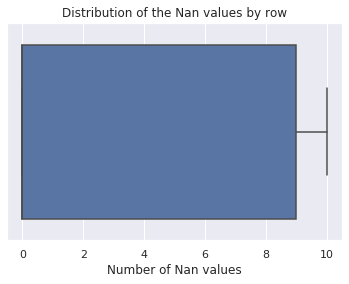

In [25]:
number_of_nan_by_row_indicators=EdStatsWithSelectedIndicators.iloc[:,len(selected_columns):].isnull().sum(axis=1)
print("Description of Nan in each row  for the selected years dataset \n "+str(number_of_nan_by_row_indicators.describe()))
number_of_nan_by_row_indicators_df=pd.DataFrame({ 'Nan': number_of_nan_by_row_indicators } )
cx=sns.boxplot(x='Nan', data=number_of_nan_by_row_indicators_df)
cx.set_title('Distribution of the Nan values by row')
cx.set_xlabel('Number of Nan values')
plt.show()

#Save the Dataframe in a CSV file
EdStatsWithSelectedIndicators.to_csv('./Edstats_csv/EdStatsDataWithSelectedIndicators.csv', sep=',',header=True,quoting=csv.QUOTE_ALL,columns=selected_columns+selected_years, index=False) 



##### EdStatsDataChunkWithSelectedYears['Country Name','Indicator Code']

In [26]:
EdStatsWithSelectedIndicators

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Counter
1243,Arab World,ARB,GDP at market prices (current US$),NY.GDP.MKTP.CD,9.594050e+11,1.176100e+12,1.399823e+12,1.638669e+12,2.079571e+12,1.791753e+12,2.097884e+12,2.487905e+12,2.744381e+12,2.853079e+12,NaN,10
1245,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,3.168186e+03,3.796022e+03,4.414093e+03,5.046817e+03,6.255761e+03,5.267553e+03,6.032962e+03,7.005480e+03,7.571402e+03,7.715999e+03,NaN,10
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,7.006812e+00,8.393142e+00,1.165465e+01,1.420590e+01,1.859353e+01,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,10
2323,Arab World,ARB,Population of the official age for secondary e...,SP.SEC.TOTL.IN,4.219553e+07,4.262789e+07,4.298773e+07,4.404203e+07,4.428236e+07,4.425107e+07,4.428212e+07,4.427659e+07,4.435677e+07,4.446921e+07,4.378628e+07,11
2326,Arab World,ARB,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,3.123657e+07,3.174729e+07,3.251090e+07,3.337651e+07,3.416219e+07,3.478300e+07,3.519644e+07,3.540634e+07,3.548681e+07,3.545010e+07,3.537356e+07,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,2.100000e+00,2.400000e+00,2.400000e+00,3.000000e+00,3.500000e+00,4.000000e+00,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,11
885588,Zimbabwe,ZWE,Population of the official age for secondary e...,SP.SEC.TOTL.IN,2.023873e+06,2.034066e+06,2.026737e+06,2.020780e+06,2.016726e+06,2.015706e+06,2.018022e+06,2.009047e+06,2.007007e+06,2.012733e+06,2.026425e+06,11
885591,Zimbabwe,ZWE,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,1.512963e+06,1.542683e+06,1.554849e+06,1.565455e+06,1.576742e+06,1.589291e+06,1.602057e+06,1.601799e+06,1.601931e+06,1.602843e+06,1.604698e+06,11
885751,Zimbabwe,ZWE,"Population, ages 15-64, total",SP.POP.1564.TO,7.017171e+06,7.124562e+06,7.245873e+06,7.372961e+06,7.507911e+06,7.652639e+06,7.807808e+06,7.982992e+06,8.171080e+06,8.369351e+06,8.575500e+06,11


###### Print the number of parameters by country

count    242.000000
mean      83.181818
std       19.649628
min       10.000000
25%       77.000000
50%       90.000000
75%       97.000000
max      101.000000
Name: Counter, dtype: float64


Text(0, 0.5, 'Nombre de pays normalisés')

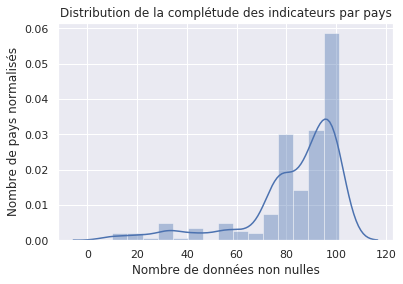

In [27]:
number_of_parameters_by_country=EdStatsWithSelectedIndicators[['Country Name','Counter']].groupby(['Country Name']).sum()
print(number_of_parameters_by_country['Counter'].describe())

ax = sns.distplot(number_of_parameters_by_country['Counter'])
ax.set_title('Distribution de la complétude des indicateurs par pays')
ax.set_xlabel('Nombre de données non nulles')
ax.set_ylabel('Nombre de pays normalisés')

In order to limit the number of countries, we decide to take only the ones that more data (3rd quartile)

###### Print the list of countries that have the most of data

In [28]:
restricted_list_of_countries=number_of_parameters_by_country.loc[number_of_parameters_by_country['Counter'] >= number_of_parameters_by_country['Counter'].quantile(0.75)]

In [29]:
list_of_selected_countries=restricted_list_of_countries.index.tolist()

list_of_selected_countries

In [30]:
EdStatsWithLimitedCountries=EdStatsWithSelectedIndicators.loc[EdStatsWithSelectedIndicators['Country Name'].isin(list_of_selected_countries)]

###### del theEdStatsWithSelectedIndicators object for memory purposes

In [31]:
del EdStatsWithSelectedIndicators

In [32]:
EdStatsWithLimitedCountries

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Counter
117671,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.537000e+01,NaN,NaN,NaN,NaN,2
117673,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,NaN,4.900000e-01,NaN,NaN,NaN,NaN,2.180000e+00,NaN,NaN,NaN,NaN,2
117685,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.CMPT.2529.ZS,NaN,3.911000e+01,NaN,NaN,NaN,NaN,5.436000e+01,NaN,NaN,NaN,NaN,2
117687,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.CMPT.2529.ZS,NaN,1.270000e+00,NaN,NaN,NaN,NaN,2.100000e-01,NaN,NaN,NaN,NaN,2
117692,Argentina,ARG,Barro-Lee: Percentage of population age 30-34 ...,BAR.SEC.CMPT.3034.ZS,NaN,3.344000e+01,NaN,NaN,NaN,NaN,3.911000e+01,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847990,United States,USA,Internet users (per 100 people),IT.NET.USER.P2,6.475826e+01,6.796805e+01,6.893119e+01,75.0,74.0,71.0,7.169000e+01,6.972946e+01,74.7,71.4,73.0,11
848938,United States,USA,Population of the official age for secondary e...,SP.SEC.TOTL.IN,2.532477e+07,2.553687e+07,2.573517e+07,25741660.0,25728344.0,25702174.0,2.565205e+07,2.557596e+07,25397300.0,25117862.0,24834576.0,11
848941,United States,USA,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2.074605e+07,2.104180e+07,2.131241e+07,21388224.0,21466660.0,21565184.0,2.167902e+07,2.181852e+07,22135816.0,22489522.0,22731736.0,11
849101,United States,USA,"Population, ages 15-64, total",SP.POP.1564.TO,1.951129e+08,1.974811e+08,1.993928e+08,201423516.0,203478887.0,205278324.0,2.068169e+08,2.080945e+08,209318529.0,210354971.0,211378325.0,11


###### The dataset with a limited number of countries is saved in a CSV file

In [33]:
#Save the Dataframe in a CSV file
EdStatsWithLimitedCountries.to_csv('./Edstats_csv/EdStatsWithLimitedCountries.csv', sep=',',header=True,quoting=csv.QUOTE_ALL,columns=selected_columns+selected_years+['Counter'], index=False) 


### Strong correlation among indicators
We suspect that there is a correlation among several indicators, so we decide to perform a specific analysis

###### Correlation among Population and Population 15 - 64
Subsetting of the population indicator

In [34]:
population_tot_df=EdStatsWithLimitedCountries.loc[EdStatsWithLimitedCountries['Indicator Code']==population][selected_years].astype(int)

In [35]:
population_tot_df

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
119813,38728696,39145488,39558890,39970224,40382389,40799407,41223889,41656879,42096739,42539925,42981515
130808,20127400,20394800,20697900,20827600,21249200,21691700,22031750,22340024,22728254,23117353,23460694
134473,8171966,8227829,8268641,8295487,8321496,8343323,8363404,8391643,8429991,8479375,8541575
149133,141307489,143431101,145368004,147139191,148805814,150454708,152149102,153911916,155727053,157571292,159405279
152798,273091,274009,275039,276150,277319,278470,279569,280601,281585,282509,283385
...,...,...,...,...,...,...,...,...,...,...,...
805168,5534598,5683268,5837792,5997385,6161796,6330472,6502952,6679282,6859482,7042948,7228915
816163,10017601,10102482,10196136,10298087,10407336,10521834,10639931,10761467,10886668,11014558,11143908
838153,47451600,47105150,46787750,46509350,46258200,46053300,45870700,45706100,45593300,45489600,45271947
845483,59987905,60401206,60846820,61322463,61806995,62276270,62766365,63258918,63700300,64128226,64613160


Subsetting of the population 15 - 64 indicator

In [36]:
population_1564_df=EdStatsWithLimitedCountries.loc[EdStatsWithLimitedCountries['Indicator Code']==population_1564][selected_years].astype(int)

In [37]:
population_1564_df

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
119766,24314082,24650249,24960036,25288050,25624337,25953592,26268474,26575746,26869103,27153851,27440753
130761,13533564,13727409,13964018,14076899,14373618,14668523,14879463,15029738,15233953,15435139,15598904
134426,5544123,5581012,5601872,5614509,5627374,5636916,5644039,5657956,5677901,5703424,5736127
149086,85967657,87921883,89601632,91228713,92834834,94463843,96152797,97987374,99843589,101732877,103669903
152751,184013,185100,186023,187019,187969,188665,189028,189564,189739,189604,189305
...,...,...,...,...,...,...,...,...,...,...,...
805121,3015775,3105624,3189227,3277140,3368703,3463385,3561187,3657959,3759228,3865184,3976251
816116,6662910,6781114,6902652,7024158,7143197,7256560,7361524,7455065,7538407,7612621,7680759
838106,32889357,32730323,32574090,32468196,32376127,32289186,32184108,31987043,31839280,31689227,31422954
845436,39477562,39850079,40186774,40522451,40834771,41103390,41350322,41474839,41563441,41637474,41744392


Reindex the dataframes for allowing the computing of the correlation

In [38]:
population_tot_index_df=population_tot_df.reset_index()
population_1564_index_df=population_1564_df.reset_index()
#population_tot_df.corrwith(other=population_1564,axis=1,method='pearson')

In [39]:
population_1564_index_df

,index,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,119766,24314082,24650249,24960036,25288050,25624337,25953592,26268474,26575746,26869103,27153851,27440753
1,130761,13533564,13727409,13964018,14076899,14373618,14668523,14879463,15029738,15233953,15435139,15598904
2,134426,5544123,5581012,5601872,5614509,5627374,5636916,5644039,5657956,5677901,5703424,5736127
3,149086,85967657,87921883,89601632,91228713,92834834,94463843,96152797,97987374,99843589,101732877,103669903
4,152751,184013,185100,186023,187019,187969,188665,189028,189564,189739,189604,189305
...,...,...,...,...,...,...,...,...,...,...,...,...
66,805121,3015775,3105624,3189227,3277140,3368703,3463385,3561187,3657959,3759228,3865184,3976251
67,816116,6662910,6781114,6902652,7024158,7143197,7256560,7361524,7455065,7538407,7612621,7680759
68,838106,32889357,32730323,32574090,32468196,32376127,32289186,32184108,31987043,31839280,31689227,31422954
69,845436,39477562,39850079,40186774,40522451,40834771,41103390,41350322,41474839,41563441,41637474,41744392


In [40]:
population_tot_index_df[selected_years]

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,38728696,39145488,39558890,39970224,40382389,40799407,41223889,41656879,42096739,42539925,42981515
1,20127400,20394800,20697900,20827600,21249200,21691700,22031750,22340024,22728254,23117353,23460694
2,8171966,8227829,8268641,8295487,8321496,8343323,8363404,8391643,8429991,8479375,8541575
3,141307489,143431101,145368004,147139191,148805814,150454708,152149102,153911916,155727053,157571292,159405279
4,273091,274009,275039,276150,277319,278470,279569,280601,281585,282509,283385
...,...,...,...,...,...,...,...,...,...,...,...
66,5534598,5683268,5837792,5997385,6161796,6330472,6502952,6679282,6859482,7042948,7228915
67,10017601,10102482,10196136,10298087,10407336,10521834,10639931,10761467,10886668,11014558,11143908
68,47451600,47105150,46787750,46509350,46258200,46053300,45870700,45706100,45593300,45489600,45271947
69,59987905,60401206,60846820,61322463,61806995,62276270,62766365,63258918,63700300,64128226,64613160


The computing of the correlation

In [41]:
population_tot_index_df[selected_years].corrwith(other=population_1564_index_df[selected_years],axis=0,method='pearson')

2004    0.999602
2005    0.999637
2006    0.999672
2007    0.999700
2008    0.999726
2009    0.999753
2010    0.999782
2011    0.999802
2012    0.999820
2013    0.999835
2014    0.999843
dtype: float64

There is a strong correlation among the two indicators, we decide to keep only the Population indicator

###### The indicator Population 15 _ 64 is deleted

In [42]:
indicators.remove(population_1564)

The rows containing the indicator 'population_1564' are removed

In [43]:
SmartData=EdStatsWithLimitedCountries.loc[EdStatsWithLimitedCountries['Indicator Code'].isin(indicators)]

###### Del the EdStatsWithLimitedCountries object for memory purposes

In [44]:
del EdStatsWithLimitedCountries

In [45]:
SmartData=SmartData.drop(columns='Counter',errors='ignore')

In [46]:
SmartData=SmartData.reset_index()

In [47]:
SmartData=SmartData.drop(columns='index',errors='ignore')

Saving of the SmartData

In [48]:
#Save the Dataframe in a CSV file
SmartData.to_csv('./Edstats_csv/SmartData.csv', sep=',',header=True,quoting=csv.QUOTE_ALL,columns=selected_columns+selected_years, index=False) 


### The Barro Lee effect on the Smart Data

Number of values in each column for the selected years dataset
 count     11.000000
mean     567.272727
std      170.232835
min      481.000000
25%      490.500000
50%      493.000000
75%      494.000000
max      914.000000
dtype: float64


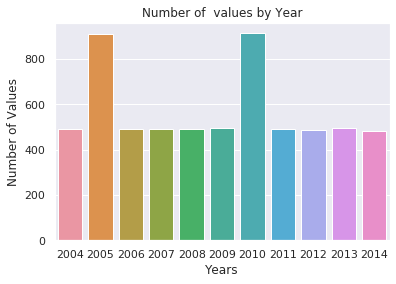

In [49]:
number_of_data_by_column_smartdata=SmartData.iloc[:,len(selected_columns):].count()
print("Number of values in each column for the selected years dataset\n "+str(number_of_data_by_column_smartdata.describe()))

selected_years_series=pd.Series(selected_years, index=selected_years)
number_of_data_by_column_smartdata_df=pd.DataFrame({ 'Year':selected_years_series,'Values': number_of_data_by_column_smartdata }, index=selected_years_series )
sns.set(color_codes=True)
ax=sns.barplot(x='Year',y='Values', data=number_of_data_by_column_smartdata_df)
ax.set_title('Number of  values by Year')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Values')
#sns.set_style("whitegrid")
#sns.boxplot(data=number_of_nan_by_column, palette="deep")
#sns.despine(left=True)

plt.show()

The two peaks can be explained by some data that are collected every 5 years. In other selected indicators, that the case of the Barro Lees. It is called the Barro Lee effect

### Average of each row for the data of the Year column

In [50]:
average_row=np.nanmean(SmartData[selected_years],axis=1)

In [51]:
SmartData['Average']=average_row.tolist()

In [52]:
SmartData

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Average
0,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.537000e+01,NaN,NaN,NaN,NaN,4.986500e+01
1,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,NaN,4.900000e-01,NaN,NaN,NaN,NaN,2.180000e+00,NaN,NaN,NaN,NaN,1.335000e+00
2,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.CMPT.2529.ZS,NaN,3.911000e+01,NaN,NaN,NaN,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.673500e+01
3,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.CMPT.2529.ZS,NaN,1.270000e+00,NaN,NaN,NaN,NaN,2.100000e-01,NaN,NaN,NaN,NaN,7.400000e-01
4,Argentina,ARG,Barro-Lee: Percentage of population age 30-34 ...,BAR.SEC.CMPT.3034.ZS,NaN,3.344000e+01,NaN,NaN,NaN,NaN,3.911000e+01,NaN,NaN,NaN,NaN,3.627500e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,4.192181e+04,4.430792e+04,4.643707e+04,4.806154e+04,4.840143e+04,4.700156e+04,4.837388e+04,4.979067e+04,5.145012e+04,5.278703e+04,5.459855e+04,4.846651e+04
916,United States,USA,Internet users (per 100 people),IT.NET.USER.P2,6.475826e+01,6.796805e+01,6.893119e+01,7.500000e+01,7.400000e+01,7.100000e+01,7.169000e+01,6.972946e+01,7.470000e+01,7.140000e+01,7.300000e+01,7.110700e+01
917,United States,USA,Population of the official age for secondary e...,SP.SEC.TOTL.IN,2.532477e+07,2.553687e+07,2.573517e+07,2.574166e+07,2.572834e+07,2.570217e+07,2.565205e+07,2.557596e+07,2.539730e+07,2.511786e+07,2.483458e+07,2.548607e+07
918,United States,USA,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2.074605e+07,2.104180e+07,2.131241e+07,2.138822e+07,2.146666e+07,2.156518e+07,2.167902e+07,2.181852e+07,2.213582e+07,2.248952e+07,2.273174e+07,2.167045e+07


In [53]:
total_population_df=SmartData[['Country Name','Average']].loc[SmartData['Indicator Code']==population]

In [54]:
total_population_df

,Country Name,Average
12,Argentina,4.082582e+07
25,Australia,2.169697e+07
38,Austria,8.348612e+06
51,Bangladesh,1.504792e+08
64,Barbados,2.783388e+05
...,...,...
867,Togo,6.350808e+06
880,Tunisia,1.054455e+07
893,Ukraine,4.619064e+07
906,United Kingdom,6.228260e+07


For the first indicator, a ranking is done by percentile on the Average column.  The data contain in the first percentile got the value 0 and the data contain in the last percentile got the value 10. 

In [55]:

percentile_values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
percentile_score=[1,2,3,4,5,6,7,8,9,10]
cut_points=np.quantile(total_population_df['Average'],percentile_values)
print(cut_points)
total_population_df=total_population_df.drop(['Score'],axis=1,errors='ignore')
total_population_df['Score']=0
print(total_population_df)
for i in range(len(percentile_values)):
    total_population_df['Score'] = total_population_df['Score'] + (total_population_df['Average'] >= cut_points[i])
print(total_population_df.sort_values(by=['Score']))

[1.57000409e+06 4.29880000e+06 5.51887409e+06 7.75140545e+06
 1.05166116e+07 1.68142675e+07 2.76519981e+07 4.61906361e+07
 9.23166245e+07 1.21245768e+09]
       Country Name       Average  Score
12        Argentina  4.082582e+07      0
25        Australia  2.169697e+07      0
38          Austria  8.348612e+06      0
51       Bangladesh  1.504792e+08      0
64         Barbados  2.783388e+05      0
..              ...           ...    ...
867            Togo  6.350808e+06      0
880         Tunisia  1.054455e+07      0
893         Ukraine  4.619064e+07      0
906  United Kingdom  6.228260e+07      0
919   United States  3.062343e+08      0

[71 rows x 3 columns]
         Country Name       Average  Score
259           Estonia  1.335507e+06      0
596         Mauritius  1.244791e+06      0
583             Malta  4.127235e+05      0
64           Barbados  2.783388e+05      0
557  Macao SAR, China  5.276706e+05      0
..                ...           ...    ...
687          Pakistan  1.67520

A for loop is performed to do the ranking of all the indicators.

In [56]:
for indicator in indicators:
    ranking_df=SmartData[['Country Name','Indicator Code','Average']].loc[SmartData['Indicator Code']==indicator]
    cut_points=np.quantile(ranking_df['Average'],percentile_values)
    #print("Indicator : "+indicator)
    print(indicator)
    print(ranking_df)
    
    

SP.POP.TOTL
       Country Name Indicator Code       Average
12        Argentina    SP.POP.TOTL  4.082582e+07
25        Australia    SP.POP.TOTL  2.169697e+07
38          Austria    SP.POP.TOTL  8.348612e+06
51       Bangladesh    SP.POP.TOTL  1.504792e+08
64         Barbados    SP.POP.TOTL  2.783388e+05
..              ...            ...           ...
867            Togo    SP.POP.TOTL  6.350808e+06
880         Tunisia    SP.POP.TOTL  1.054455e+07
893         Ukraine    SP.POP.TOTL  4.619064e+07
906  United Kingdom    SP.POP.TOTL  6.228260e+07
919   United States    SP.POP.TOTL  3.062343e+08

[71 rows x 3 columns]
SP.SEC.TOTL.IN
       Country Name  Indicator Code       Average
10        Argentina  SP.SEC.TOTL.IN  4.143083e+06
23        Australia  SP.SEC.TOTL.IN  1.719157e+06
36          Austria  SP.SEC.TOTL.IN  7.527699e+05
49       Bangladesh  SP.SEC.TOTL.IN  2.249765e+07
62         Barbados  SP.SEC.TOTL.IN  1.929955e+04
..              ...             ...           ...
865         

IndexError: cannot do a non-empty take from an empty axes.

Some indicators have no data => it is required to check the number of data by Indicator Code

In [57]:
ranking_df=SmartData[['Country Name','Indicator Code','Average']].loc[SmartData['Indicator Code']=='LO.EGRA.READ.ENG.ADV.4GRD']

In [58]:
ranking_df

,Country Name,Indicator Code,Average


In [59]:
print("Number of lines by country \n" +str(SmartData[['Country Name','Indicator Code']].groupby(['Indicator Code']).count() ))

Number of lines by country 
                           Country Name
Indicator Code                         
BAR.SEC.CMPT.2024.ZS                 70
BAR.SEC.CMPT.2529.ZS                 71
BAR.SEC.CMPT.3034.ZS                 71
BAR.TER.CMPT.2024.ZS                 68
BAR.TER.CMPT.2529.ZS                 71
BAR.TER.CMPT.3034.ZS                 70
IT.NET.USER.P2                       71
LO.EGRA.READ.ENG.ADV.2GRD             1
LO.EGRA.READ.ENG.ADV.3GRD             1
NY.GDP.MKTP.CD                       71
NY.GDP.PCAP.CD                       71
SE.XPD.TOTL.GB.ZS                    71
SP.POP.TOTL                          71
SP.SEC.TOTL.IN                       71
SP.TER.TOTL.IN                       71


The indicators LO.EGRA.READ.ENG.ADV.2GRD and LO.EGRA.READ.ENG.ADV.3GRD have only data for one country. Moreover, we can notice that the indicator LO.EGRA.READ.ENG.ADV.4GRD have no data  => these indicators are not relevant, so we decide to remove them.

In [60]:
indicators.remove(english_reading_grade2)
indicators.remove(english_reading_grade3)
indicators.remove(english_reading_grade4)

The dataset is reviewed to contain only the relevant indicators.

In [61]:
SmartData=SmartData.loc[SmartData['Indicator Code'].isin(indicators)]

The index of the dataset is resetted

In [62]:
SmartData=SmartData.reset_index()

In [63]:
SmartData

,index,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Average
0,0,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.537000e+01,NaN,NaN,NaN,NaN,4.986500e+01
1,1,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,NaN,4.900000e-01,NaN,NaN,NaN,NaN,2.180000e+00,NaN,NaN,NaN,NaN,1.335000e+00
2,2,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.CMPT.2529.ZS,NaN,3.911000e+01,NaN,NaN,NaN,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.673500e+01
3,3,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.CMPT.2529.ZS,NaN,1.270000e+00,NaN,NaN,NaN,NaN,2.100000e-01,NaN,NaN,NaN,NaN,7.400000e-01
4,4,Argentina,ARG,Barro-Lee: Percentage of population age 30-34 ...,BAR.SEC.CMPT.3034.ZS,NaN,3.344000e+01,NaN,NaN,NaN,NaN,3.911000e+01,NaN,NaN,NaN,NaN,3.627500e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,915,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,4.192181e+04,4.430792e+04,4.643707e+04,4.806154e+04,4.840143e+04,4.700156e+04,4.837388e+04,4.979067e+04,5.145012e+04,5.278703e+04,5.459855e+04,4.846651e+04
914,916,United States,USA,Internet users (per 100 people),IT.NET.USER.P2,6.475826e+01,6.796805e+01,6.893119e+01,7.500000e+01,7.400000e+01,7.100000e+01,7.169000e+01,6.972946e+01,7.470000e+01,7.140000e+01,7.300000e+01,7.110700e+01
915,917,United States,USA,Population of the official age for secondary e...,SP.SEC.TOTL.IN,2.532477e+07,2.553687e+07,2.573517e+07,2.574166e+07,2.572834e+07,2.570217e+07,2.565205e+07,2.557596e+07,2.539730e+07,2.511786e+07,2.483458e+07,2.548607e+07
916,918,United States,USA,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2.074605e+07,2.104180e+07,2.131241e+07,2.138822e+07,2.146666e+07,2.156518e+07,2.167902e+07,2.181852e+07,2.213582e+07,2.248952e+07,2.273174e+07,2.167045e+07


For each indicator, a ranking is done by percentile on the Average column.  The data contain in the first percentile got the  value 0 and the data contain in the last percentile got the  value 10. 

In [64]:
NewSmartData=pd.DataFrame()
SmartData['Score']=0
for indicator in indicators:
    #ranking_df=SmartData[['Country Name','Indicator Code','Average']].loc[SmartData['Indicator Code']==indicator]
    ranking_df=SmartData.loc[SmartData['Indicator Code']==indicator]
    ranking_df['Score']=0
    cut_points=np.quantile(ranking_df['Average'],percentile_values)
    
    for i in range(len(percentile_values)):
        ranking_df['Score'] = ranking_df['Score'] + (ranking_df['Average'] >= cut_points[i])

    NewSmartData=NewSmartData.combine_first(ranking_df)
    
    print(indicator)
    print(ranking_df)


SP.POP.TOTL
     index    Country Name Country Code     Indicator Name Indicator Code  \
12      12       Argentina          ARG  Population, total    SP.POP.TOTL   
25      25       Australia          AUS  Population, total    SP.POP.TOTL   
38      38         Austria          AUT  Population, total    SP.POP.TOTL   
51      51      Bangladesh          BGD  Population, total    SP.POP.TOTL   
64      64        Barbados          BRB  Population, total    SP.POP.TOTL   
..     ...             ...          ...                ...            ...   
865    867            Togo          TGO  Population, total    SP.POP.TOTL   
878    880         Tunisia          TUN  Population, total    SP.POP.TOTL   
891    893         Ukraine          UKR  Population, total    SP.POP.TOTL   
904    906  United Kingdom          GBR  Population, total    SP.POP.TOTL   
917    919   United States          USA  Population, total    SP.POP.TOTL   

            2004         2005         2006         2007        

BAR.TER.CMPT.3034.ZS
     index    Country Name Country Code  \
5        5       Argentina          ARG   
18      18       Australia          AUS   
31      31         Austria          AUT   
44      44      Bangladesh          BGD   
57      57        Barbados          BRB   
..     ...             ...          ...   
858    860            Togo          TGO   
871    873         Tunisia          TUN   
884    886         Ukraine          UKR   
897    899  United Kingdom          GBR   
910    912   United States          USA   

                                        Indicator Name        Indicator Code  \
5    Barro-Lee: Percentage of population age 30-34 ...  BAR.TER.CMPT.3034.ZS   
18   Barro-Lee: Percentage of population age 30-34 ...  BAR.TER.CMPT.3034.ZS   
31   Barro-Lee: Percentage of population age 30-34 ...  BAR.TER.CMPT.3034.ZS   
44   Barro-Lee: Percentage of population age 30-34 ...  BAR.TER.CMPT.3034.ZS   
57   Barro-Lee: Percentage of population age 30-34 ...  BAR.TE

### Definition of a function to perform the ranking on a specific column

In [74]:
def scoring(dataframe,indicators,colin, colout,percentile_values):
    NewSmartData2=pd.DataFrame()
    dataframe[colout]=0
    for indicator in indicators:
        #ranking_df=SmartData[['Country Name','Indicator Code','Average']].loc[SmartData['Indicator Code']==indicator]
        ranking_df=dataframe.loc[SmartData['Indicator Code']==indicator]
        ranking_df[colout]=0
        cut_points=np.quantile(ranking_df[colin],percentile_values)
    
        for i in range(len(percentile_values)):
            ranking_df[colout] = ranking_df[colout] + (ranking_df[colin] >= cut_points[i])

        NewSmartData2=NewSmartData2.combine_first(ranking_df)
    
        print(indicator)
        print(ranking_df)
    
    return  NewSmartData2   

In [75]:
NewSmartData=scoring(SmartData, indicators, 'Average','Score',percentile_values)
NewSmartData=scoring(NewSmartData, indicators, '2005','Score2005',percentile_values)
NewSmartData=scoring(NewSmartData, indicators, '2010','Score2010',percentile_values)
NewSmartData


SP.POP.TOTL
     index    Country Name Country Code     Indicator Name Indicator Code  \
12      12       Argentina          ARG  Population, total    SP.POP.TOTL   
25      25       Australia          AUS  Population, total    SP.POP.TOTL   
38      38         Austria          AUT  Population, total    SP.POP.TOTL   
51      51      Bangladesh          BGD  Population, total    SP.POP.TOTL   
64      64        Barbados          BRB  Population, total    SP.POP.TOTL   
..     ...             ...          ...                ...            ...   
865    867            Togo          TGO  Population, total    SP.POP.TOTL   
878    880         Tunisia          TUN  Population, total    SP.POP.TOTL   
891    893         Ukraine          UKR  Population, total    SP.POP.TOTL   
904    906  United Kingdom          GBR  Population, total    SP.POP.TOTL   
917    919   United States          USA  Population, total    SP.POP.TOTL   

            2004         2005         2006         2007        

BAR.TER.CMPT.3034.ZS
     index    Country Name Country Code  \
5        5       Argentina          ARG   
18      18       Australia          AUS   
31      31         Austria          AUT   
44      44      Bangladesh          BGD   
57      57        Barbados          BRB   
..     ...             ...          ...   
858    860            Togo          TGO   
871    873         Tunisia          TUN   
884    886         Ukraine          UKR   
897    899  United Kingdom          GBR   
910    912   United States          USA   

                                        Indicator Name        Indicator Code  \
5    Barro-Lee: Percentage of population age 30-34 ...  BAR.TER.CMPT.3034.ZS   
18   Barro-Lee: Percentage of population age 30-34 ...  BAR.TER.CMPT.3034.ZS   
31   Barro-Lee: Percentage of population age 30-34 ...  BAR.TER.CMPT.3034.ZS   
44   Barro-Lee: Percentage of population age 30-34 ...  BAR.TER.CMPT.3034.ZS   
57   Barro-Lee: Percentage of population age 30-34 ...  BAR.TE

SP.SEC.TOTL.IN
     index    Country Name Country Code  \
10    10.0       Argentina          ARG   
23    23.0       Australia          AUS   
36    36.0         Austria          AUT   
49    49.0      Bangladesh          BGD   
62    62.0        Barbados          BRB   
..     ...             ...          ...   
863  865.0            Togo          TGO   
876  878.0         Tunisia          TUN   
889  891.0         Ukraine          UKR   
902  904.0  United Kingdom          GBR   
915  917.0   United States          USA   

                                        Indicator Name  Indicator Code  \
10   Population of the official age for secondary e...  SP.SEC.TOTL.IN   
23   Population of the official age for secondary e...  SP.SEC.TOTL.IN   
36   Population of the official age for secondary e...  SP.SEC.TOTL.IN   
49   Population of the official age for secondary e...  SP.SEC.TOTL.IN   
62   Population of the official age for secondary e...  SP.SEC.TOTL.IN   
..                      

BAR.TER.CMPT.3034.ZS
     index    Country Name Country Code  \
5      5.0       Argentina          ARG   
18    18.0       Australia          AUS   
31    31.0         Austria          AUT   
44    44.0      Bangladesh          BGD   
57    57.0        Barbados          BRB   
..     ...             ...          ...   
858  860.0            Togo          TGO   
871  873.0         Tunisia          TUN   
884  886.0         Ukraine          UKR   
897  899.0  United Kingdom          GBR   
910  912.0   United States          USA   

                                        Indicator Name        Indicator Code  \
5    Barro-Lee: Percentage of population age 30-34 ...  BAR.TER.CMPT.3034.ZS   
18   Barro-Lee: Percentage of population age 30-34 ...  BAR.TER.CMPT.3034.ZS   
31   Barro-Lee: Percentage of population age 30-34 ...  BAR.TER.CMPT.3034.ZS   
44   Barro-Lee: Percentage of population age 30-34 ...  BAR.TER.CMPT.3034.ZS   
57   Barro-Lee: Percentage of population age 30-34 ...  BAR.TE

SP.TER.TOTL.IN
     index    Country Name Country Code  \
11    11.0       Argentina          ARG   
24    24.0       Australia          AUS   
37    37.0         Austria          AUT   
50    50.0      Bangladesh          BGD   
63    63.0        Barbados          BRB   
..     ...             ...          ...   
864  866.0            Togo          TGO   
877  879.0         Tunisia          TUN   
890  892.0         Ukraine          UKR   
903  905.0  United Kingdom          GBR   
916  918.0   United States          USA   

                                        Indicator Name  Indicator Code  \
11   Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
24   Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
37   Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
50   Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
63   Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
..                      

NY.GDP.PCAP.CD
     index    Country Name Country Code                Indicator Name  \
8      8.0       Argentina          ARG  GDP per capita (current US$)   
21    21.0       Australia          AUS  GDP per capita (current US$)   
34    34.0         Austria          AUT  GDP per capita (current US$)   
47    47.0      Bangladesh          BGD  GDP per capita (current US$)   
60    60.0        Barbados          BRB  GDP per capita (current US$)   
..     ...             ...          ...                           ...   
861  863.0            Togo          TGO  GDP per capita (current US$)   
874  876.0         Tunisia          TUN  GDP per capita (current US$)   
887  889.0         Ukraine          UKR  GDP per capita (current US$)   
900  902.0  United Kingdom          GBR  GDP per capita (current US$)   
913  915.0   United States          USA  GDP per capita (current US$)   

     Indicator Code          2004          2005          2006          2007  \
8    NY.GDP.PCAP.CD   4251.57

,index,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Average,Score,Score2005,Score2010
0,0.0,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.537000e+01,NaN,NaN,NaN,NaN,4.986500e+01,5.0,7.0,4.0
1,1.0,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,NaN,4.900000e-01,NaN,NaN,NaN,NaN,2.180000e+00,NaN,NaN,NaN,NaN,1.335000e+00,0.0,0.0,1.0
2,2.0,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.CMPT.2529.ZS,NaN,3.911000e+01,NaN,NaN,NaN,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.673500e+01,7.0,5.0,8.0
3,3.0,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.CMPT.2529.ZS,NaN,1.270000e+00,NaN,NaN,NaN,NaN,2.100000e-01,NaN,NaN,NaN,NaN,7.400000e-01,0.0,0.0,0.0
4,4.0,Argentina,ARG,Barro-Lee: Percentage of population age 30-34 ...,BAR.SEC.CMPT.3034.ZS,NaN,3.344000e+01,NaN,NaN,NaN,NaN,3.911000e+01,NaN,NaN,NaN,NaN,3.627500e+01,5.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,915.0,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,4.192181e+04,4.430792e+04,4.643707e+04,4.806154e+04,4.840143e+04,4.700156e+04,4.837388e+04,4.979067e+04,5.145012e+04,5.278703e+04,5.459855e+04,4.846651e+04,8.0,9.0,8.0
914,916.0,United States,USA,Internet users (per 100 people),IT.NET.USER.P2,6.475826e+01,6.796805e+01,6.893119e+01,7.500000e+01,7.400000e+01,7.100000e+01,7.169000e+01,6.972946e+01,7.470000e+01,7.140000e+01,7.300000e+01,7.110700e+01,8.0,8.0,7.0
915,917.0,United States,USA,Population of the official age for secondary e...,SP.SEC.TOTL.IN,2.532477e+07,2.553687e+07,2.573517e+07,2.574166e+07,2.572834e+07,2.570217e+07,2.565205e+07,2.557596e+07,2.539730e+07,2.511786e+07,2.483458e+07,2.548607e+07,9.0,9.0,9.0
916,918.0,United States,USA,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2.074605e+07,2.104180e+07,2.131241e+07,2.138822e+07,2.146666e+07,2.156518e+07,2.167902e+07,2.181852e+07,2.213582e+07,2.248952e+07,2.273174e+07,2.167045e+07,9.0,9.0,0.0


In [76]:
NewSmartData

,index,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Average,Score,Score2005,Score2010
0,0.0,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.537000e+01,NaN,NaN,NaN,NaN,4.986500e+01,5.0,7.0,4.0
1,1.0,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,NaN,4.900000e-01,NaN,NaN,NaN,NaN,2.180000e+00,NaN,NaN,NaN,NaN,1.335000e+00,0.0,0.0,1.0
2,2.0,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.CMPT.2529.ZS,NaN,3.911000e+01,NaN,NaN,NaN,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.673500e+01,7.0,5.0,8.0
3,3.0,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.CMPT.2529.ZS,NaN,1.270000e+00,NaN,NaN,NaN,NaN,2.100000e-01,NaN,NaN,NaN,NaN,7.400000e-01,0.0,0.0,0.0
4,4.0,Argentina,ARG,Barro-Lee: Percentage of population age 30-34 ...,BAR.SEC.CMPT.3034.ZS,NaN,3.344000e+01,NaN,NaN,NaN,NaN,3.911000e+01,NaN,NaN,NaN,NaN,3.627500e+01,5.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,915.0,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,4.192181e+04,4.430792e+04,4.643707e+04,4.806154e+04,4.840143e+04,4.700156e+04,4.837388e+04,4.979067e+04,5.145012e+04,5.278703e+04,5.459855e+04,4.846651e+04,8.0,9.0,8.0
914,916.0,United States,USA,Internet users (per 100 people),IT.NET.USER.P2,6.475826e+01,6.796805e+01,6.893119e+01,7.500000e+01,7.400000e+01,7.100000e+01,7.169000e+01,6.972946e+01,7.470000e+01,7.140000e+01,7.300000e+01,7.110700e+01,8.0,8.0,7.0
915,917.0,United States,USA,Population of the official age for secondary e...,SP.SEC.TOTL.IN,2.532477e+07,2.553687e+07,2.573517e+07,2.574166e+07,2.572834e+07,2.570217e+07,2.565205e+07,2.557596e+07,2.539730e+07,2.511786e+07,2.483458e+07,2.548607e+07,9.0,9.0,9.0
916,918.0,United States,USA,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2.074605e+07,2.104180e+07,2.131241e+07,2.138822e+07,2.146666e+07,2.156518e+07,2.167902e+07,2.181852e+07,2.213582e+07,2.248952e+07,2.273174e+07,2.167045e+07,9.0,9.0,0.0


In [77]:
NewSmartData=NewSmartData.drop(columns='index',errors='ignore')
NewSmartData

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Average,Score,Score2005,Score2010
0,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.537000e+01,NaN,NaN,NaN,NaN,4.986500e+01,5.0,7.0,4.0
1,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,NaN,4.900000e-01,NaN,NaN,NaN,NaN,2.180000e+00,NaN,NaN,NaN,NaN,1.335000e+00,0.0,0.0,1.0
2,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.CMPT.2529.ZS,NaN,3.911000e+01,NaN,NaN,NaN,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.673500e+01,7.0,5.0,8.0
3,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.CMPT.2529.ZS,NaN,1.270000e+00,NaN,NaN,NaN,NaN,2.100000e-01,NaN,NaN,NaN,NaN,7.400000e-01,0.0,0.0,0.0
4,Argentina,ARG,Barro-Lee: Percentage of population age 30-34 ...,BAR.SEC.CMPT.3034.ZS,NaN,3.344000e+01,NaN,NaN,NaN,NaN,3.911000e+01,NaN,NaN,NaN,NaN,3.627500e+01,5.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,4.192181e+04,4.430792e+04,4.643707e+04,4.806154e+04,4.840143e+04,4.700156e+04,4.837388e+04,4.979067e+04,5.145012e+04,5.278703e+04,5.459855e+04,4.846651e+04,8.0,9.0,8.0
914,United States,USA,Internet users (per 100 people),IT.NET.USER.P2,6.475826e+01,6.796805e+01,6.893119e+01,7.500000e+01,7.400000e+01,7.100000e+01,7.169000e+01,6.972946e+01,7.470000e+01,7.140000e+01,7.300000e+01,7.110700e+01,8.0,8.0,7.0
915,United States,USA,Population of the official age for secondary e...,SP.SEC.TOTL.IN,2.532477e+07,2.553687e+07,2.573517e+07,2.574166e+07,2.572834e+07,2.570217e+07,2.565205e+07,2.557596e+07,2.539730e+07,2.511786e+07,2.483458e+07,2.548607e+07,9.0,9.0,9.0
916,United States,USA,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2.074605e+07,2.104180e+07,2.131241e+07,2.138822e+07,2.146666e+07,2.156518e+07,2.167902e+07,2.181852e+07,2.213582e+07,2.248952e+07,2.273174e+07,2.167045e+07,9.0,9.0,0.0


### The dataset is saved

In [78]:
#Save the Dataframe in a CSV file
NewSmartData.to_csv('./Edstats_csv/NewSmartData.csv', sep=',',header=True,quoting=csv.QUOTE_ALL, columns=NewSmartData.columns.tolist(), index=False) 


### Some KPIs

In [79]:
print("Columns:")
NewSmartData.count()


Columns:


Country Name      918
Country Code      918
Indicator Name    918
Indicator Code    918
2004              491
2005              909
2006              490
2007              493
2008              493
2009              494
2010              914
2011              492
2012              489
2013              492
2014              480
Average           918
Score             918
Score2005         918
Score2010         918
dtype: int64

In [80]:
NewSmartData.count(axis=1)

0      10
1      10
2      10
3      10
4      10
       ..
913    19
914    19
915    19
916    19
917    19
Length: 918, dtype: int64

In [81]:
print("Number of indicators:"+ str(len(indicators)))

Number of indicators:13


### Barro Lee Effect

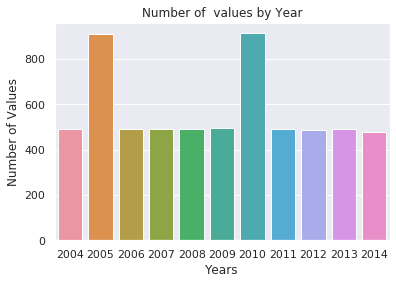

In [82]:
number_of_data_by_column_newsmartdata=NewSmartData.iloc[:,len(selected_columns):].count()

selected_years_series=pd.Series(selected_years, index=selected_years)
number_of_data_by_column_newsmartdata_df=pd.DataFrame({ 'Year':selected_years_series,'Values': number_of_data_by_column_newsmartdata }, index=selected_years_series )
sns.set(color_codes=True)
ax=sns.barplot(x='Year',y='Values', data=number_of_data_by_column_newsmartdata_df)
ax.set_title('Number of  values by Year')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Values')
#sns.set_style("whitegrid")
#sns.boxplot(data=number_of_nan_by_column, palette="deep")
#sns.despine(left=True)

plt.show()

The two peaks can be explained by some data that are collected every 5 years. In other selected indicators, that the case of the Barro Lees. It is called the Barro Lee effect